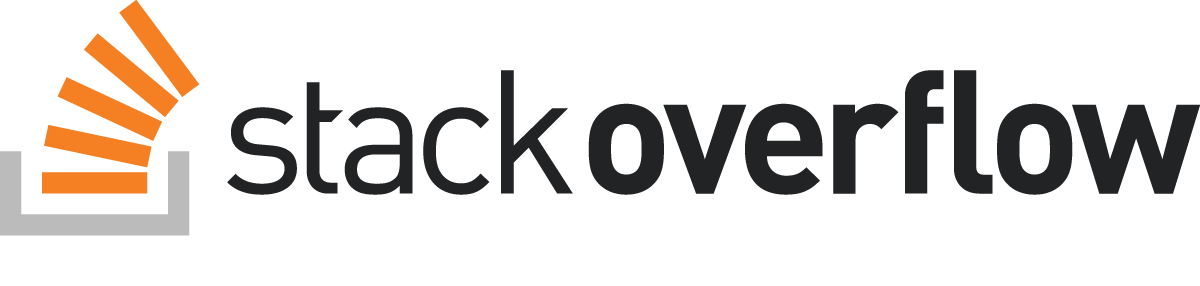

# Stack Overflow Annual Developer Survey Analysis

This notebook aims at taking a different look at the data from the Stack Overflow Annual Developer Survey, and in particular at identifying the trends and changes that are occuring in the recent years around the data science community.

We will be following the CRISP-DM (Cross-Industry Standard Process for Data Mining) in order to answer the following 3 questions:

1. Are more and more developers becoming data scientists?
2. What programming languages are favored by data scientists?
3. What features recorded in the survey stand out the most for data scientists?


## Step 1: Importing the data

Let us start by importing the relevant libraries necessary for the data wrangling, and later the visualization: pandas, numpy, and matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

Now, let us read in the csv files containing the cleaned results of the surveys for the years 2017, 2018 and 2019. In order to do that, we will use the zipfile package.

In [2]:
zf1 = zipfile.ZipFile('developer_survey_2017.zip')
df_2017 = pd.read_csv(zf1.open('survey_results_public.csv'))

zf2 = zipfile.ZipFile('developer_survey_2018.zip')
df_2018 = pd.read_csv(zf2.open('survey_results_public.csv'))

zf3 = zipfile.ZipFile('developer_survey_2019.zip')
df_2019 = pd.read_csv(zf3.open('survey_results_public.csv'))

C:\Users\bottljac\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Step 2: Assessing and cleaning the data

To see what value can be extracted from these datasets to answer the questions raised, we are first going to take a look at some summary information, namely how many variables (questions in the survey) and observations (people answering) each survey contains, in order to get a better idea of the amount of information we have available.

In [3]:
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df_2017.info(), df_2018.info(), df_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 

This outlines one of the difficulties of dealing with non-standardized surveys from different years: we have different questions that have been asked with sometimes different available choices for the answers. To stay consistent, we will have to focus on similar questions across the years.

Regarding the number of people answering the surveys, we can see that respectively **51392, 98855 and 88883** people have answered the survey in **2017, 2018 and 2019**.

This is a sample size that is big enough for us to get interesting information, though we should keep in mind that this is NOT a random sample from the population (not even from the developer population), but a voluntary sample from users of a specific site, which might very well cause important bias. Caution should be used when trying to infer conclusions regarding the population.

As described in the intro, for the purpose of this project, we are mainly interested in trends and changes for data scientists. The definition of a data scientist tends to be broad and varying between employers.

In each of these surveys there actually is a question asking the person which job title(s) best describe(s) them:
* In the 2017 survey, this is the question _Q210. Which following best describe you as a software developer?_
* In the 2018 survey, this is the question _Which of the following describe you? Please select all that apply._
* In the 2019 survey, this is the question _Which of the following describe you? Please select all that apply._

The results of these questions are stored in the respective columns:
* `DeveloperType`
* `DevType`
* `DevType`

Let us have a look at these columns:

In [5]:
print(df_2017['DeveloperType'], df_2018['DevType'], df_2019['DevType'])

0                                                      NaN
1                                                      NaN
2                                                    Other
3                                                      NaN
4        Mobile developer; Graphics programming; Deskto...
5                                                      NaN
6                                                      NaN
7                                            Web developer
8                          Web developer; Mobile developer
9         Mobile developer; Desktop applications developer
10                                                     NaN
11                                           Web developer
12                                                     NaN
13                                           Web developer
14                 Embedded applications/devices developer
15                          Desktop applications developer
16                                           Web develop

In order to extract the subsets of the original datasets that concern data scientists, we can write a function that will retrieve the index of the rows that contain a specific job title in the value of a specified column.

**NOTE**: multiple answers were allowed for that question, so that someone could have answered `Web developer` as well as `Data scientist` for instance. We are making the assumption that anyone who defined themselves as `Data scientist` in this question (even if amongst other titles) is a data scientist.

Before we go ahead and extract this data, we should ask ourselves what we want to do with the rows that contain a missing value for the developer type. 

It is likely that a person not answering that question would do so because the option that best describes them is not listed, or because they feel like the question as a whole is not relevant to them. In both of these cases, **it seems appropriate NOT to consider people who did not answer this question as data scientists**.

Upon closer inspection of the surveys, we can also notice a change in the `developer type` question and the proposed answers: while the surveys from 2018 and 2019 are very similar in their approach and group together in one category data scientists and machine learning specialists, the survey from 2017 separates them into 2 different categories.

Because of this, we need to modify our function so it is able to take a list of job titles, rather than a single one.

The function will identify the index of the rows that contain one or more of the titles in the list (without counting a row twice!). With this trick, we will be able to compare the 2017 results with 2018 and 2019.

The function in question can be found below.

In [6]:
def job_idx_finder(df, jobs, col):
    '''
    This function finds the row index of individuals whose answer in the input column included the input job(s).
    
    INPUT:
    df - the pandas dataframe you want to search
    job - the job(s) title you want to look for
    col - the column you want to look in
    
    OUTPUT:
    idx - list of the indexes of the rows of the original dataframe that contain the searched job(s)
    '''
    
    idx = []

    new_df = df[col].dropna()

    for job in jobs:
        for i in new_df.index:
            if job in new_df[i]:
                idx.append(i)
            
    return sorted(set(idx))

If we apply this function to our datasets, with the appropriate column name for each year and 'Data scientist' as the job title to look for in 2018 and 2019, and 'Data scientist', 'Machine learning specialist' as the titles to look for in 2017, we obtain the index lists of the people in each survey who identify as data scientists (for the purpose of this project, we consider ML specialists to be specialised data scientists).

In [7]:
#let us apply the created function to the datasets for the 3 years
idx_data_scientist_2017 = job_idx_finder(df_2017, ['Data scientist', 'Machine learning specialist'], 'DeveloperType')
idx_data_scientist_2018 = job_idx_finder(df_2018, ['Data scientist'], 'DevType')
idx_data_scientist_2019 = job_idx_finder(df_2019, ['Data scientist'], 'DevType')

Let us perform a rapid sense check to see whether our function seems to make sense:

In [8]:
df_2019['DevType'][idx_data_scientist_2019]

5        Data or business analyst;Data scientist or mac...
9        Data or business analyst;Data scientist or mac...
11       Data or business analyst;Data scientist or mac...
32       Academic researcher;Data scientist or machine ...
61       Data or business analyst;Data scientist or mac...
65       Data scientist or machine learning specialist;...
96       Data or business analyst;Data scientist or mac...
98       Academic researcher;Data or business analyst;D...
109      Data or business analyst;Data scientist or mac...
128      Academic researcher;Data scientist or machine ...
132      Academic researcher;Data or business analyst;D...
143      Academic researcher;Data scientist or machine ...
144      Data scientist or machine learning specialist;...
172      Academic researcher;Data or business analyst;D...
182      Data scientist or machine learning specialist;...
187      Data or business analyst;Data scientist or mac...
190      Data scientist or machine learning specialist;.

Looks fine! 

Now, to make the analysis more efficient down the line, let us **add a boolean column to each of these dataframes, that contains a 1 if the individual in the row is a data scientist, and 0 if they are not**.

To avoid repetition, we are going to build a small function to help us do just that.

In [9]:
def add_data_scientist_column(df, idx_data_scientist, col_name='DataScientist'):
    '''
    This function adds a column to a dataframe, with 1 for rows with an index in the index list
    given as input, and 0 otherwise.
    
    INPUT:
    df - the data frame to which the column should be added
    idx_data_scientist - the list of row index for data scientists
    col_name - the name of the column added to the dataframe
    
    OUTPUT:
    new_df - the dataframe containing the boolean column
    '''
    
    #Let us first create an empty list
    lst = []
    
    #Now we iterate over the rows in df, checking if the index of each row is in the row index list
    for i in range(len(df)):
        lst.append(int(i in idx_data_scientist))

    #Finally, we add the resulting list to the dataframe as a panda series
    new_df = df
    new_df[col_name] = pd.Series(lst)
    
    return new_df
    

In [10]:
#Not let us use this function to transform the 3 dataframes
df_2017 = add_data_scientist_column(df_2017, idx_data_scientist_2017, col_name='DataScientist')
df_2018 = add_data_scientist_column(df_2018, idx_data_scientist_2018, col_name='DataScientist')
df_2019 = add_data_scientist_column(df_2019, idx_data_scientist_2019, col_name='DataScientist')

In [11]:
#Again, let us perform a quick sense check
df_2018.iloc[idx_data_scientist_2018, :]

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,DataScientist
18,29,Yes,Yes,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,"10,000 or more employees",Data or business analyst;Data scientist or mac...,...,Female,NaN,Some college/university study without earning ...,NaN,NaN,NaN,NaN,The survey was too long,Very difficult,1
28,45,Yes,Yes,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Data scientist or machine l...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
40,60,Yes,No,Germany,"Yes, full-time",Employed part-time,"Secondary school (e.g. American high school, G...",NaN,"1,000 to 4,999 employees",Data scientist or machine learning specialist;...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
62,91,Yes,Yes,United States,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Data scientist or machine l...,...,Male,Straight or heterosexual,"Professional degree (JD, MD, etc.)",White or of European descent,25 - 34 years old,No,No,The survey was too long,Somewhat easy,1
86,129,Yes,Yes,United States,"Yes, full-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Data scientist or machine l...,...,Male,Straight or heterosexual,"Other doctoral degree (Ph.D, Ed.D., etc.)",East Asian,18 - 24 years old,No,No,The survey was too long,Somewhat easy,1
88,132,Yes,No,Finland,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...",500 to 999 employees,Data scientist or machine learning specialist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
126,187,Yes,No,Italy,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Data scientist or machine learning specialist,...,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,25 - 34 years old,No,NaN,The survey was an appropriate length,Neither easy nor difficult,1
131,195,Yes,Yes,Poland,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Data or business analyst;Da...,...,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat easy,1
136,206,Yes,Yes,Sweden,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Data scientist or machine l...,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,25 - 34 years old,No,NaN,The survey was an appropriate length,Somewhat easy,1
140,214,Yes,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A social science (ex. anthropology, psychology...","1,000 to 4,999 employees",Data scientist or machine learning specialist;...,...,Male,NaN,"Other doctoral degree (Ph.D, Ed.D., etc.)",White or of European descent,25 - 34 years old,No,Yes,The survey was too long,Very easy,1


Looks good as well. Now, let us pre-process the datasets to have a look at the programming languages.

There are 2 columns in each survey related to the programming language, one reflecting the language(s) currently used by the respondent, and another one the ones they want to use in the future.

The columns are identified as followed:

* `HaveWorkedLanguage` and `WantWorkLanguage` for the 2017 survey
* `LanguageWorkedWith` and `LanguageDesireNextYearfor` the 2018 survey
* `LanguageWorkedWith` and `LanguageDesireNextYearfor` the 2019 survey

The data is input as one string per row, containing all the languages selected by a respondent separated by `;`. What we need to do to enable the analysis of this information is to separate these strings into a list, and then to one-hot encode this information.

One-hot encoding a pd.Series that contains lists is not straightforward, luckily a brilliant piece of code to help with that can be found [here](https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies). And yes, I also use Stack Overflow a lot!

In [12]:
#To avoid repetition of code, we will create a function for this purpose

def get_dummies_series_list(df, col, sep, prefix):
    '''
    This function one-hot encodes a series containing a string with items separated by the input separator.
    
    INPUT:
    df - the dataframe in which the column to one-hot encode is
    col - the column to one-hot encode
    sep - the separator between the items in the strings of the input column
    prefix - the prefix to put in the names of the one-hot encoded columns
    
    OUTPUT:
    new_df - the dataframe with the input column dropped, and instead the information one-hot encoded
    '''
    
    #NOTE: The 2017 dataframes also contains blank spaces before the sep, so we need to remove them
    new_col = df[col].str.split(pat=sep).dropna().apply(lambda x: [i.strip(' ') for i in x])
    
    one_hot_columns = pd.get_dummies(new_col.apply(pd.Series).stack(), prefix=prefix).sum(level=0)
    
    new_df = pd.concat([df.drop(columns=[col]), one_hot_columns], axis=1)
    
    return new_df

In [13]:
#Now let us apply this to the 3 dataframes, for the currently used languages columns
df_2017_lge = get_dummies_series_list(df_2017, 'HaveWorkedLanguage', ';', 'UsedLanguage')
df_2018_lge = get_dummies_series_list(df_2018, 'LanguageWorkedWith', ';', 'UsedLanguage')
df_2019_lge = get_dummies_series_list(df_2019, 'LanguageWorkedWith', ';', 'UsedLanguage')

In [14]:
df_2019_lge.iloc[:, 10:30].head()

,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal
0,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN
2,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0
3,Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0
4,Taken an online course in programming or softw...,"10,000 or more employees","Academic researcher;Developer, desktop or ente...",16,14,9,Very dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,No,I am not interested in new job opportunities,Less than a year ago,"Write any code;Write code by hand (e.g., on a ...",No,"Industry that I'd be working in;Languages, fra...",I was preparing for a job search,UAH,Ukrainian hryvnia,NaN


In [15]:
df_2019_lge.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       ...
       'UsedLanguage_Python', 'UsedLanguage_R', 'UsedLanguage_Ruby',
       'UsedLanguage_Rust', 'UsedLanguage_SQL', 'UsedLanguage_Scala',
       'UsedLanguage_Swift', 'UsedLanguage_TypeScript', 'UsedLanguage_VBA',
       'UsedLanguage_WebAssembly'],
      dtype='object', length=113)

Finally, let us prepare a copy of the 2019 dataset that we will clean in order to use it to build our model in step 4. We need to remove the NA values (imputation, for the categorical variables, makes little sense here, and would just dilute the information that we have for the float columns), and one-hot encode the categorical varaibles selected.

In [16]:
#Here are the columns that we will include in our model in part 4:
model_cols = ['Hobbyist', 'OpenSourcer', 'OpenSource', 'Country',
              'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize',
              'YearsCode', 'YearsCodePro', 'CareerSat', 'JobSat', 
              'JobFactors', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
              'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn',
              'CodeRev', 'LanguageWorkedWith', 'Age', 'Gender',
              'DataScientist']

#We have some pre-processing work to do amongst these columns, starting with dropping all the NAN rows
model_df = df_2019[model_cols].dropna()

#Then, we can move on to the one-hot encoding of the categorical variables - excluding the ones with mutliple choices
#and binary outcomes

cat_cols = ['OpenSourcer', 'OpenSource', 'Country', 'EdLevel',
            'UndergradMajor', 'OrgSize', 'CareerSat', 'JobSat',
            'WorkPlan', 'WorkRemote', 'WorkLoc', 'ImpSyn',
            'CodeRev', 'Gender']

model_df = pd.get_dummies(model_df, columns=cat_cols, prefix=cat_cols)

model_df.head()

,Hobbyist,EduOther,YearsCode,YearsCodePro,JobFactors,ConvertedComp,WorkWeekHrs,WorkChallenge,LanguageWorkedWith,Age,...,CodeRev_No,"CodeRev_Yes, because I see value in code review","CodeRev_Yes, because I was told to do so",Gender_Man,"Gender_Man;Non-binary, genderqueer, or gender non-conforming","Gender_Non-binary, genderqueer, or gender non-conforming",Gender_Woman,Gender_Woman;Man,"Gender_Woman;Man;Non-binary, genderqueer, or gender non-conforming","Gender_Woman;Non-binary, genderqueer, or gender non-conforming"
2,Yes,"Taught yourself a new language, framework, or ...",3,1,"Languages, frameworks, and other technologies ...",8820.0,40.0,Distracting work environment;Inadequate access...,HTML/CSS,28.0,...,1,0,0,1,0,0,0,0,0,0
8,Yes,Taken an online course in programming or softw...,12,4,Financial performance or funding status of the...,95179.0,32.0,Being tasked with non-development work;Inadequ...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,23.0,...,0,1,0,1,0,0,0,0,0,0
12,Yes,Taken an online course in programming or softw...,17,8,"Languages, frameworks, and other technologies ...",90000.0,40.0,"Meetings;Non-work commitments (parenting, scho...",Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,28.0,...,0,1,0,1,0,0,0,0,0,0
13,Yes,Completed an industry certification program (e...,13,2,"Languages, frameworks, and other technologies ...",57060.0,40.0,Being tasked with non-development work;Not eno...,C++,31.0,...,0,1,0,1,0,0,0,0,0,0
16,Yes,Taken an online course in programming or softw...,5,2,"Languages, frameworks, and other technologies ...",65277.0,45.0,Distracting work environment;Meetings;Time spe...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...,29.0,...,0,1,0,1,0,0,0,0,0,0


In [17]:
#Now let's re-encode the binary columns from Yes/No to 0/1
model_df['Hobbyist'] = model_df['Hobbyist'].map(dict(Yes=1, No=0))

model_df.head()

,Hobbyist,EduOther,YearsCode,YearsCodePro,JobFactors,ConvertedComp,WorkWeekHrs,WorkChallenge,LanguageWorkedWith,Age,...,CodeRev_No,"CodeRev_Yes, because I see value in code review","CodeRev_Yes, because I was told to do so",Gender_Man,"Gender_Man;Non-binary, genderqueer, or gender non-conforming","Gender_Non-binary, genderqueer, or gender non-conforming",Gender_Woman,Gender_Woman;Man,"Gender_Woman;Man;Non-binary, genderqueer, or gender non-conforming","Gender_Woman;Non-binary, genderqueer, or gender non-conforming"
2,1,"Taught yourself a new language, framework, or ...",3,1,"Languages, frameworks, and other technologies ...",8820.0,40.0,Distracting work environment;Inadequate access...,HTML/CSS,28.0,...,1,0,0,1,0,0,0,0,0,0
8,1,Taken an online course in programming or softw...,12,4,Financial performance or funding status of the...,95179.0,32.0,Being tasked with non-development work;Inadequ...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,23.0,...,0,1,0,1,0,0,0,0,0,0
12,1,Taken an online course in programming or softw...,17,8,"Languages, frameworks, and other technologies ...",90000.0,40.0,"Meetings;Non-work commitments (parenting, scho...",Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,28.0,...,0,1,0,1,0,0,0,0,0,0
13,1,Completed an industry certification program (e...,13,2,"Languages, frameworks, and other technologies ...",57060.0,40.0,Being tasked with non-development work;Not eno...,C++,31.0,...,0,1,0,1,0,0,0,0,0,0
16,1,Taken an online course in programming or softw...,5,2,"Languages, frameworks, and other technologies ...",65277.0,45.0,Distracting work environment;Meetings;Time spe...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...,29.0,...,0,1,0,1,0,0,0,0,0,0


In [18]:
#To simplify things, we will approximate people with less than a year of coding experience as having 0 years of exp,
#and people with more than 50 years as having 50 years of exp
for i in ['YearsCode', 'YearsCodePro']:
    for k in model_df.index:
        if model_df.loc[k, i] == 'Less than 1 year':
            model_df.loc[k, i] = 0
        elif model_df.loc[k, i] == 'More than 50 years':
            model_df.loc[k, i] = 50

model_df.head()

,Hobbyist,EduOther,YearsCode,YearsCodePro,JobFactors,ConvertedComp,WorkWeekHrs,WorkChallenge,LanguageWorkedWith,Age,...,CodeRev_No,"CodeRev_Yes, because I see value in code review","CodeRev_Yes, because I was told to do so",Gender_Man,"Gender_Man;Non-binary, genderqueer, or gender non-conforming","Gender_Non-binary, genderqueer, or gender non-conforming",Gender_Woman,Gender_Woman;Man,"Gender_Woman;Man;Non-binary, genderqueer, or gender non-conforming","Gender_Woman;Non-binary, genderqueer, or gender non-conforming"
2,1,"Taught yourself a new language, framework, or ...",3,1,"Languages, frameworks, and other technologies ...",8820.0,40.0,Distracting work environment;Inadequate access...,HTML/CSS,28.0,...,1,0,0,1,0,0,0,0,0,0
8,1,Taken an online course in programming or softw...,12,4,Financial performance or funding status of the...,95179.0,32.0,Being tasked with non-development work;Inadequ...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,23.0,...,0,1,0,1,0,0,0,0,0,0
12,1,Taken an online course in programming or softw...,17,8,"Languages, frameworks, and other technologies ...",90000.0,40.0,"Meetings;Non-work commitments (parenting, scho...",Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,28.0,...,0,1,0,1,0,0,0,0,0,0
13,1,Completed an industry certification program (e...,13,2,"Languages, frameworks, and other technologies ...",57060.0,40.0,Being tasked with non-development work;Not eno...,C++,31.0,...,0,1,0,1,0,0,0,0,0,0
16,1,Taken an online course in programming or softw...,5,2,"Languages, frameworks, and other technologies ...",65277.0,45.0,Distracting work environment;Meetings;Time spe...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...,29.0,...,0,1,0,1,0,0,0,0,0,0


In [19]:
#Finally, we need to convert the more complex columns where multiple choices were allowed, into one-hot encoded columns
for col in ['EduOther', 'LanguageWorkedWith', 'JobFactors', 'WorkChallenge']:
    model_df = get_dummies_series_list(model_df, col, ';', col)

In [20]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42663 entries, 2 to 88330
Columns: 289 entries, Hobbyist to WorkChallenge_Toxic work environment
dtypes: float64(3), int64(2), object(2), uint8(282)
memory usage: 15.3+ MB


We still have 2 object columns, let's have a look at which ones these are:

In [21]:
model_df.select_dtypes('object')

,YearsCode,YearsCodePro
2,3,1
8,12,4
12,17,8
13,13,2
16,5,2
18,14,13
19,8,4
22,3,1
25,12,8
31,3,2


Seems like the coding experience in years is till considered as a categorical variable. Let's change that by casting them as integers:

In [22]:
model_df['YearsCode'] = model_df['YearsCode'].astype('int')
model_df['YearsCodePro'] = model_df['YearsCodePro'].astype('int')

In [23]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42663 entries, 2 to 88330
Columns: 289 entries, Hobbyist to WorkChallenge_Toxic work environment
dtypes: float64(3), int32(2), int64(2), uint8(282)
memory usage: 15.0 MB


Looks like we are good to go now!

## Step 3: Analysing the data

Let us now have a look at our first question:

**Are more and more developers becoming data scientists?**

To answer this, let us have a look at the proportion of data scientists in the respondents of the surveys for each year.


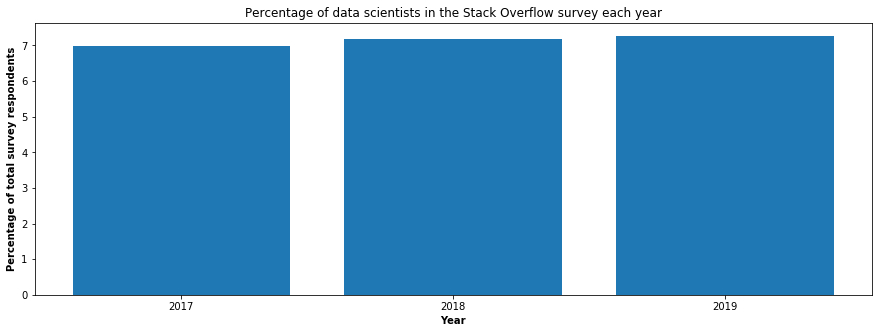

The proportion of data scientists in the survey respondents in 2017 was 7.00%.
The proportion of data scientists in the survey respondents in 2018 was 7.17%.
The proportion of data scientists in the survey respondents in 2019 was 7.27%.


In [24]:
prop_data_scientist_2017 = df_2017_lge['DataScientist'].mean()
prop_data_scientist_2018 = df_2018_lge['DataScientist'].mean()
prop_data_scientist_2019 = df_2019_lge['DataScientist'].mean()

plt.figure(figsize=(15,5))
plt.bar(['2017', '2018', '2019'], [prop_data_scientist_2017*100, prop_data_scientist_2018*100, prop_data_scientist_2019*100])
plt.xlabel('Year', fontweight='bold'); plt.ylabel('Percentage of total survey respondents', fontweight='bold')
plt.title('Percentage of data scientists in the Stack Overflow survey each year')
plt.show()

print(f'The proportion of data scientists in the survey respondents in 2017 was {prop_data_scientist_2017:.2%}.')
print(f'The proportion of data scientists in the survey respondents in 2018 was {prop_data_scientist_2018:.2%}.')
print(f'The proportion of data scientists in the survey respondents in 2019 was {prop_data_scientist_2019:.2%}.')

There seems to be a very small increase in the percentage over these 3 years, however it is really difficult to infer whether it is actually linked to a real increase in the proportion of data scientist users of Stack Overflow, or sampling variation due to a different fraction of people answering the surveys on different years.

What if we focus on a specific region of the world? The USA, with the silicon valley, seems very likely to be hiring more data scientists than anywhere else. Could the proportion of data scientists be increasing there?

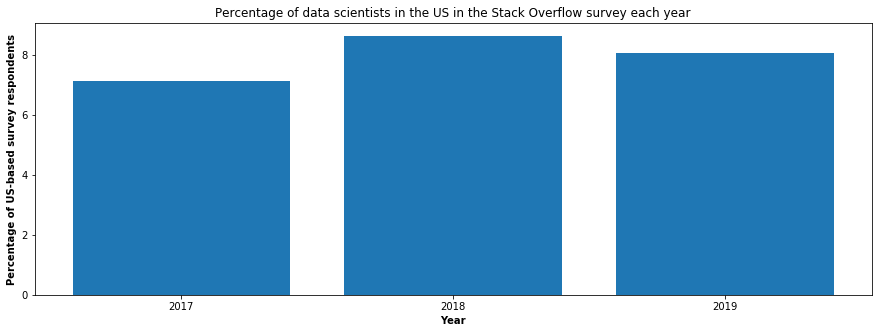

The proportion of data scientists in the survey respondents in 2017 was 7.15%.
The proportion of data scientists in the survey respondents in 2018 was 8.64%.
The proportion of data scientists in the survey respondents in 2019 was 8.05%.


In [25]:
prop_data_scientist_2017_US = df_2017_lge[df_2017_lge['Country']=='United States']['DataScientist'].mean()
prop_data_scientist_2018_US = df_2018_lge[df_2018_lge['Country']=='United States']['DataScientist'].mean()
prop_data_scientist_2019_US = df_2019_lge[df_2019_lge['Country']=='United States']['DataScientist'].mean()

plt.figure(figsize=(15,5))
plt.bar(['2017', '2018', '2019'], [prop_data_scientist_2017_US*100, prop_data_scientist_2018_US*100, prop_data_scientist_2019_US*100])
plt.xlabel('Year', fontweight='bold'); plt.ylabel('Percentage of US-based survey respondents', fontweight='bold')
plt.title('Percentage of data scientists in the US in the Stack Overflow survey each year')
plt.show()

print(f'The proportion of data scientists in the survey respondents in 2017 was {prop_data_scientist_2017_US:.2%}.')
print(f'The proportion of data scientists in the survey respondents in 2018 was {prop_data_scientist_2018_US:.2%}.')
print(f'The proportion of data scientists in the survey respondents in 2019 was {prop_data_scientist_2019_US:.2%}.')

Even when only considering the US-based respondents of the survey, we don't really see a trend pointing towards an increase of the proportion of data scientist users of Stack Overflow over the last few years. Interesting!

We can however note that a category for `Data or business analyst` has been added from 2018 on.

Now, on to our second question:

**What programming languages are favored by data scientists?**

Do data scientists tend to use more R, Python and Matlab (as one would expect)? And is one language more prevalent than the others? How are these trends evolving of the 3 years which we have available?

This information is stored in 2 different columns per year, one reflecting the language(s) currently used by the respondent, and another one the ones they want to use in the future.

The columns are identified as followed:
* `HaveWorkedLanguage` and `WantWorkLanguage` for the 2017 survey
* `LanguageWorkedWith` and `LanguageDesireNextYear`for the 2018 survey
* `LanguageWorkedWith` and `LanguageDesireNextYear`for the 2019 survey

To answer these question, we will focus on the **used languages** for each respondent.

In [26]:
for i in range(len(df_2019_lge.columns)):
    print(i, df_2019_lge.columns[i])

0 Respondent
1 MainBranch
2 Hobbyist
3 OpenSourcer
4 OpenSource
5 Employment
6 Country
7 Student
8 EdLevel
9 UndergradMajor
10 EduOther
11 OrgSize
12 DevType
13 YearsCode
14 Age1stCode
15 YearsCodePro
16 CareerSat
17 JobSat
18 MgrIdiot
19 MgrMoney
20 MgrWant
21 JobSeek
22 LastHireDate
23 LastInt
24 FizzBuzz
25 JobFactors
26 ResumeUpdate
27 CurrencySymbol
28 CurrencyDesc
29 CompTotal
30 CompFreq
31 ConvertedComp
32 WorkWeekHrs
33 WorkPlan
34 WorkChallenge
35 WorkRemote
36 WorkLoc
37 ImpSyn
38 CodeRev
39 CodeRevHrs
40 UnitTests
41 PurchaseHow
42 PurchaseWhat
43 LanguageDesireNextYear
44 DatabaseWorkedWith
45 DatabaseDesireNextYear
46 PlatformWorkedWith
47 PlatformDesireNextYear
48 WebFrameWorkedWith
49 WebFrameDesireNextYear
50 MiscTechWorkedWith
51 MiscTechDesireNextYear
52 DevEnviron
53 OpSys
54 Containers
55 BlockchainOrg
56 BlockchainIs
57 BetterLife
58 ITperson
59 OffOn
60 SocialMedia
61 Extraversion
62 ScreenName
63 SOVisit1st
64 SOVisitFreq
65 SOVisitTo
66 SOFindAnswer
67 SOTimeSa

In [27]:
def lge_user_count(dfs, col_idxs, names):
    '''
    This function builds a dataframe holding the percentages of users in the dataframes for the language columns passed.
    
    INPUT:
    dfs - the dataframes to search
    col_idxs - must be a list the same length as the number of dataframe, containing the index of the first language col
    names - the names of the summary columns
    
    OUTPUT:
    summary_df - dataframe holding the percentages of users in the dataframes for the languages passed
    '''
    
    lst = []
    col = 0
    
    for df in dfs:
        
        prop_users_lge = []

        for i in df.iloc[:, col_idxs[col]:].columns:
            prop_users_lge.append(df[i].mean()*100)
            
        prop_users_lge = pd.Series(prop_users_lge, index=df.iloc[:, col_idxs[col]:].columns)
        
        col += 1
        lst.append(prop_users_lge)
    
    new_df = pd.concat(lst, axis=1, sort=True)
    new_df.columns = names
    
    return new_df
    

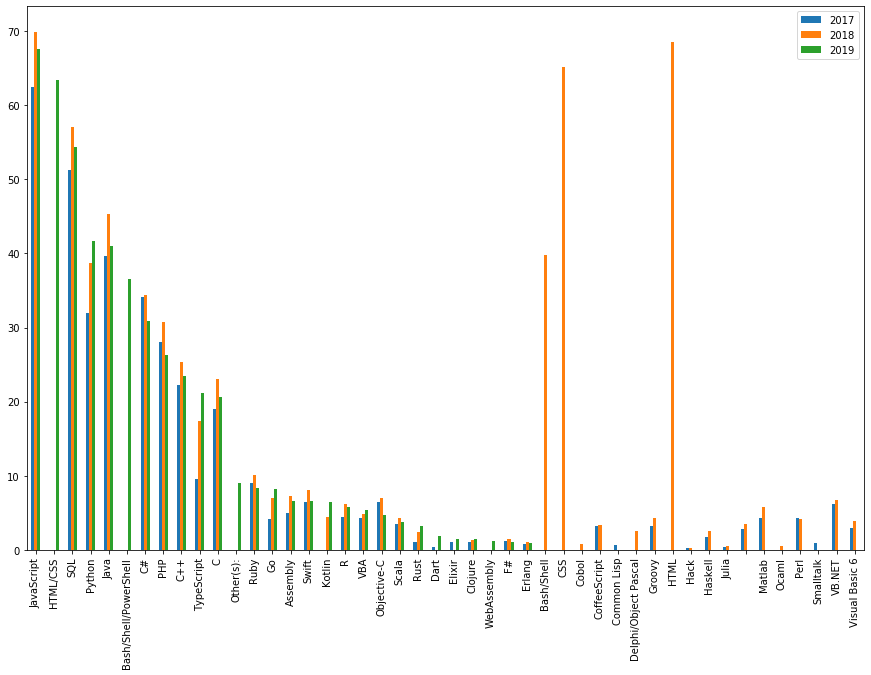

In [28]:
general_lge = lge_user_count([df_2017_lge, df_2018_lge, df_2019_lge], [154, 129, 85], ['2017', '2018', '2019'])

general_lge.index = general_lge.index.str.lstrip('UsedLanguage_')

general_lge.sort_values(by='2019', ascending=False).plot.bar(figsize=(15,10));

Python definitely is a widespread language in the developer community, not only in data scientists, with over 40% of developers saying they used it in 2019! It is known to be a very versatile language, and the data confirms this. It is also interesting to see its progression over 2017, 2018 and 2019: it gained about 10% of users in a couple of years!

R and Matlab are much more niche, with around 5% of users each. Matlab did not even make it in the 2019 survey... Ouch! Hefty prices for a license, when R and Python are free, might be a big contributor to that.

Do we see any different trends when we consider only data scientists, instead of all developers? Let us have a look.

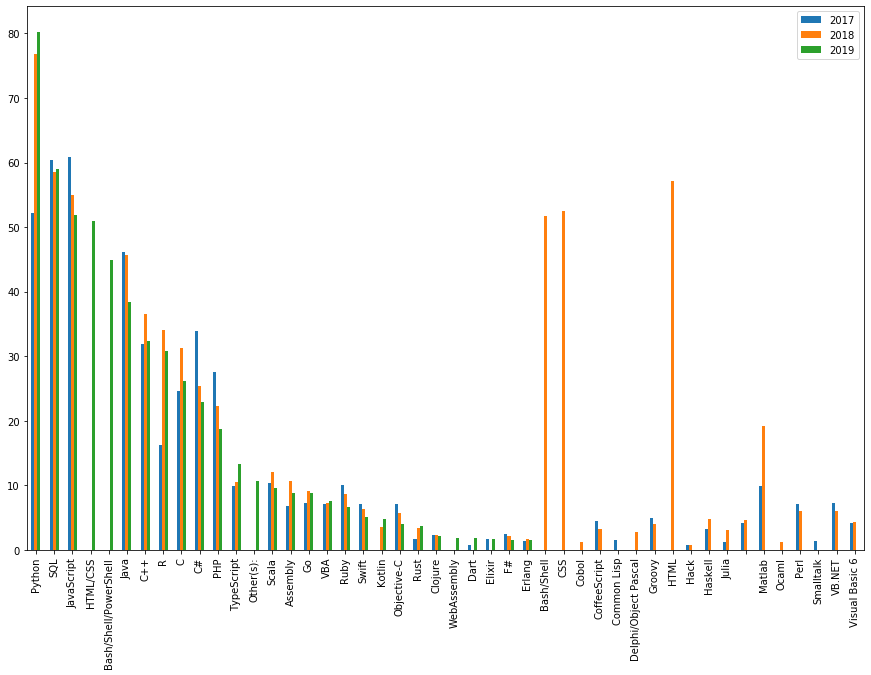

In [29]:
data_scientist_lge = lge_user_count([df_2017_lge[df_2017_lge['DataScientist'] == 1], df_2018_lge[df_2018_lge['DataScientist'] == 1], df_2019_lge[df_2019_lge['DataScientist'] == 1]], [154, 129, 85], ['2017', '2018', '2019'])

data_scientist_lge.index = data_scientist_lge.index.str.lstrip('UsedLanguage_')

data_scientist_lge.sort_values(by='2019', ascending=False).plot.bar(figsize=(15,10));

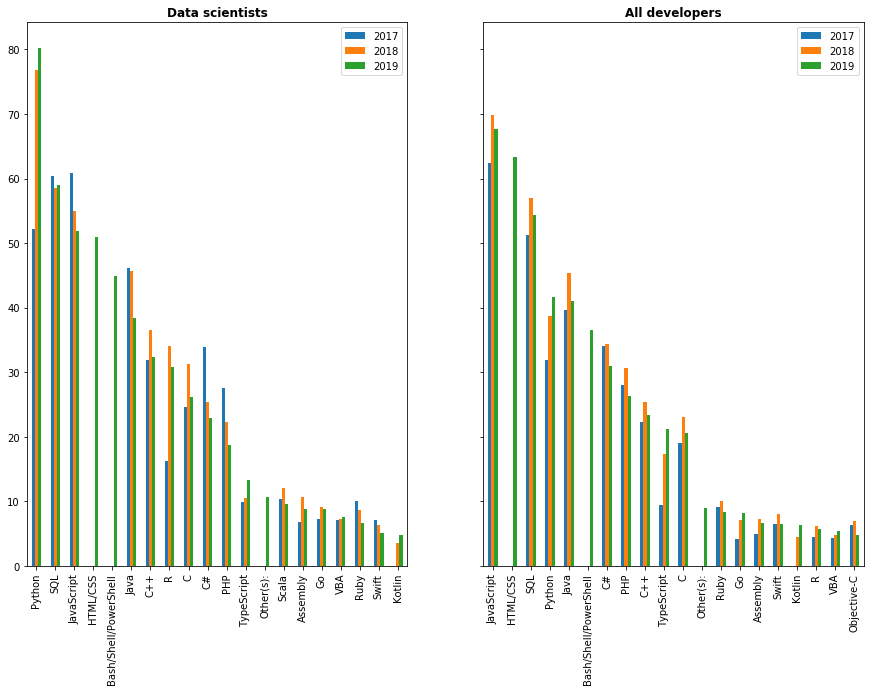

In [30]:
#Let us compare the top 20 languages amongst developers and data scientists
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(20, 10))

data_scientist_lge.sort_values(by='2019', ascending=False).nlargest(20, '2019').plot.bar(figsize=(15,10), ax=ax1)
general_lge.sort_values(by='2019', ascending=False).nlargest(20, '2019').plot.bar(figsize=(15,10), ax=ax2)

ax1.set_title('Data scientists', fontweight='bold')
ax2.set_title('All developers', fontweight='bold')
plt.show()


In [31]:
data_scientist_lge.sort_values(by='2019', ascending=False).nlargest(20, '2019')

,2017,2018,2019
Python,52.260739,76.783030,80.165806
SQL,60.437076,58.476700,59.048960
JavaScript,60.889224,55.035911,51.916158
HTML/CSS,NaN,NaN,50.961990
Bash/Shell/PowerShell,NaN,NaN,44.955420
Java,46.119066,45.699015,38.370092
C++,31.876413,36.562552,32.316596
R,16.277317,34.007015,30.893164
C,24.566692,31.301152,26.184890
C#,33.948757,25.338233,22.884405


In [32]:
general_lge.sort_values(by='2019', ascending=False).nlargest(20, '2019')

,2017,2018,2019
JavaScript,62.457338,69.811321,67.625530
HTML/CSS,NaN,NaN,63.339766
SQL,51.205461,57.025047,54.293186
Python,31.956314,38.755840,41.616325
Java,39.655973,45.345572,41.015656
Bash/Shell/PowerShell,NaN,NaN,36.532335
C#,34.064164,34.409069,30.943599
PHP,28.095563,30.728675,26.299261
C++,22.266212,25.368295,23.437518
TypeScript,9.523549,17.394746,21.152463


Based on the graph above, it is clear that data scientists use Python and R much more than the overall population of developers: **+40% of python users among data scientist vs in the overall population of developers in 2019! and +25% for R!**.

Interestingly, we can see that other languages like SQL, JavaScript and HTML are also widely used in the data scientist community, with respectively 59, 52 and 51% of users. We can also notice that while the Python user base is expanding year to year, the R user base slightly shrunk in 2019 vs 2018. This likely indicates that some data scientists have shifted from R to Python, which is also a change I tend to observe more and more in the industry.

Now, let us try to model the data in order to check what characteristics tend to set data scientists apart from other developers.

## Step 4: Modelling the data

In order to identify which characteristics tend to set data scientists apart from other developers, we are going to build a classification model using the 2019 dataset (as we want to look here at the most recent data), with the created column `DataScientist` as the outcome. We will use our `model_df` dataframe that we created in the pre-processing step.

As a model, we will be using the random forest classifier implementation from the awesome [scikit-learn](https://scikit-learn.org/stable/) package.

Once we have built this model, we will be able to investigate the weight of the different features inside of it, to know what sets data scientists apart!

In [35]:
#Imports for the modelling part
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [36]:
#First, let us separate our data into X and y
X, y = model_df.drop(columns=['DataScientist']), model_df['DataScientist']

#Then, let us separate the training data from the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#We are going to use a minmax scaler for our numerical features
numerical = ['ConvertedComp', 'WorkWeekHrs', 'Age', 'YearsCode', 'YearsCodePro']

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train.loc[:, numerical])

scaled_X_train = X_train.copy()
scaled_X_test = X_test.copy()

scaled_X_train.loc[:, numerical] = scaler.transform(X_train.loc[:, numerical])
scaled_X_test.loc[:, numerical] = scaler.transform(X_test.loc[:, numerical])


In [37]:
#Now, let us instantiate the model
model = RandomForestClassifier(n_estimators=100)

#And fit it
model.fit(scaled_X_train, y_train)

#Calculate the test and train predictions 
y_train_pred = model.predict(scaled_X_train)
y_test_pred = model.predict(scaled_X_test)

#Calculate the fbeta and accuracy scores
fbeta_train = fbeta_score(y_train, y_train_pred, 0.1)
accuracy_train = accuracy_score(y_train, y_train_pred)
fbeta_test = fbeta_score(y_test, y_test_pred, 0.1)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(fbeta_train, accuracy_train, fbeta_test, accuracy_test)

0.9999926332461602 0.9999414005273952 0.6467449306296691 0.9257002226649479


Let us now plot the most important features and have a look at what they are.

In [38]:
def feature_plot(importances, X_train, y_train):
    '''
    This function plots a bar chart of the 10 most important features of the feature_importances_ property from a sklearn fit
    model, and returns a dataframe containing this features and their corresponding weights in the model.
    
    INPUT:
    importances - the importance_features_ property of a sklearn fit model
    X_train - the training set used for the model
    y_train - the testing set used for the model
    
    OUTPUT:
    important_features - dataframe containing the top 10 features and their weights
    '''
    
    # Display the 10 most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # Creat the plot
    fig = plt.figure(figsize = (15,10))
    plt.title("Normalized Weights for First 10 Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(10), values, width = 0.6, align="center", color = 'c', \
          label = "Feature Weight")
    plt.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = 'g', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(10), columns, rotation='vertical')
    plt.xlim((-0.5, 9.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.show()  
    
    important_features = pd.DataFrame(values, index=columns, columns=['Normalized Weights'])
    
    display(important_features)
    
    return important_features

_Code for the visualization derived from the Udacity project "Finding Donors for Charity ML"._

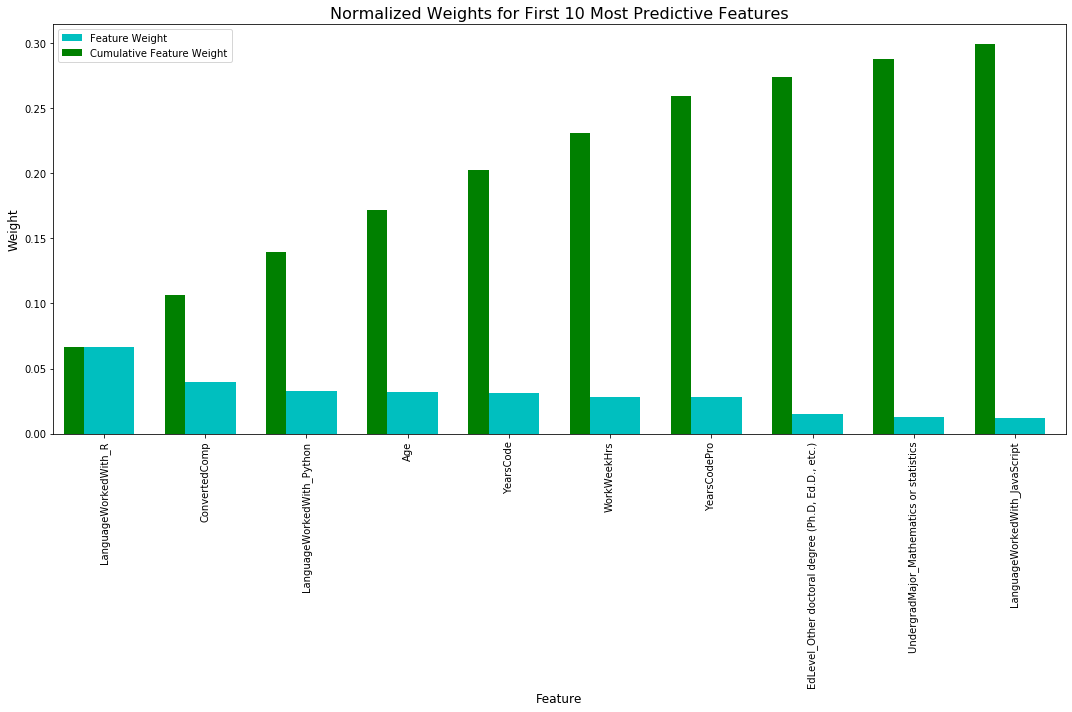

,Normalized Weights
LanguageWorkedWith_R,0.066416
ConvertedComp,0.040034
LanguageWorkedWith_Python,0.033067
Age,0.031918
YearsCode,0.031131
WorkWeekHrs,0.028346
YearsCodePro,0.028233
"EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",0.015058
UndergradMajor_Mathematics or statistics,0.013173
LanguageWorkedWith_JavaScript,0.011905


In [39]:
model_top10_features = feature_plot(model.feature_importances_, X_train, y_train)

In [40]:
#Now let us see the differences in means for these features for the whole 2019 dataset
for feature in ['ConvertedComp', 'Age', 'WorkWeekHrs']:
    print('The average %s is %f for data scientists, and %f for other developers.' 
          % (feature,
             df_2019[df_2019['DataScientist'] == 1][feature].mean(),
             df_2019[df_2019['DataScientist'] == 0][feature].mean()))

for feature in ['YearsCode', 'YearsCodePro']:
    print('The average %s is %f for data scientists, and %f for other developers.' 
          % (feature,
             pd.to_numeric(df_2019[df_2019['DataScientist'] == 1][feature], errors='coerce').mean(),
             pd.to_numeric(df_2019[df_2019['DataScientist'] == 0][feature], errors='coerce').mean()))
    

The average ConvertedComp is 142191.269860 for data scientists, and 125878.428206 for other developers.
The average Age is 30.496339 for data scientists, and 30.324173 for other developers.
The average WorkWeekHrs is 42.475754 for data scientists, and 42.098701 for other developers.
The average YearsCode is 12.096450 for data scientists, and 11.764770 for other developers.
The average YearsCodePro is 8.193398 for data scientists, and 8.623092 for other developers.


Interesting! From these results, we can start to get a clearer image of the typical Stack Overflow data scientist member. 

This data allows us to answer our third and last question:

**What features recorded in the survey stand out the most for data scientists?**

Unsurprisingly, as seen earlier, the heavy use of the R and Python programming languages are amongst the top features. We get some additional information though, with the compensation being the second predictor: amongst developers, it seems that data scientists tend to be pretty well paid! 

The other results offer a partial explanation to this pay discrepancy, as it appears data scientists tend to be amongst the older and more experienced programmers.

Lastly, we can see that data scientists also tend to have a high level of formal education, especially with Ph.Ds, and to have studied maths or statistics at some point.